In [28]:
# import zipfile for extracting csv files
path = 'survey.zip' # use this if zipfile is on the same folder
from zipfile import ZipFile
with ZipFile(path, 'r') as zip_object:
  zip_object.extractall()
  zip_object.close()

In [29]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [ ]:
# print all column names to find some questions...
for col in sorted(df.columns):
  print(col)

In [33]:
# create a function to print a column's name description
def print_desc(col_name):
  print(schema.loc[schema.Column == col_name].Question.values[0])

Suppose I was someone in IT and I want to get a job that pays more than my current one.
Using the stack overflow survey can help me determine what job should I get next.

Here's the list of questions that will help me to find the answer

*   What are the most used languages according to the survey?
*   What is the average pay for each language?
*   What kind of jobs I can work with the top payed languages?
*   What is the best way to learn that language?



In [34]:
# most used language
from collections import Counter
language_counter = Counter()

no_nan_languages = df['HaveWorkedLanguage'].dropna()
no_nan_languages.apply(lambda col: language_counter.update(col.split(';')))

language_counter.most_common(5)

[(' SQL', 18466),
 (' JavaScript', 17159),
 (' Python', 10719),
 (' PHP', 9765),
 (' Java', 8622)]

In [35]:
df_top_languages = pd.DataFrame(language_counter.most_common(5), columns=['Language', 'Frequency'])
df_top_languages = df_top_languages.set_index('Language')
df_top_languages.head()

,Frequency
Language,
SQL,18466
JavaScript,17159
Python,10719
PHP,9765
Java,8622


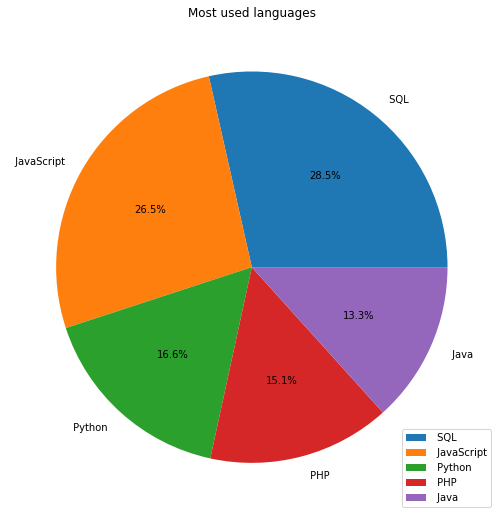

In [37]:
df_top_languages.plot(kind='pie', y='Frequency', figsize=(12, 9), autopct='%1.1f%%')
plt.title('Most used languages')
plt.ylabel(None);

In [39]:
# average pay for each language?
lang_list = [x[0].strip() for x in language_counter.most_common(5)]
temp_list = []
for language in lang_list:
  temp_list.append(
      {
          'language': language,
          'average_salary': df.query('@language in HaveWorkedLanguage')['Salary'].mean()
      }
  )
df_average_salary = pd.DataFrame(temp_list)

df_average_salary = df_average_salary.set_index('language')

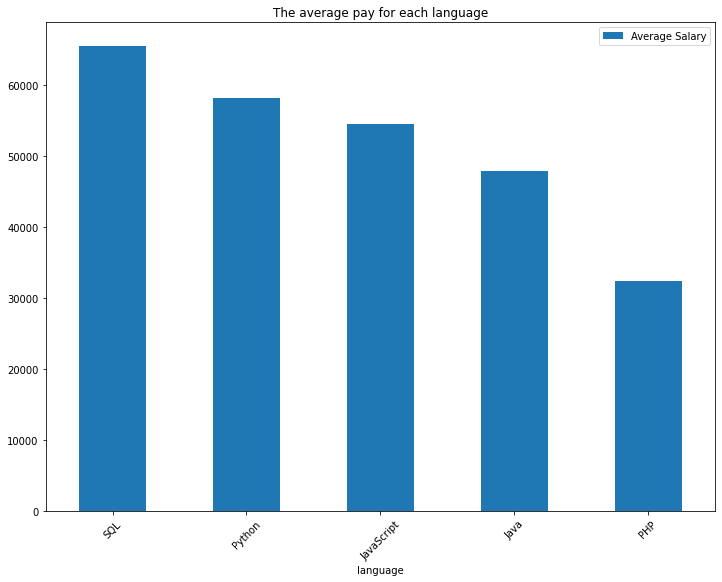

In [44]:
df_average_salary.sort_values('average_salary', ascending=False).plot(kind='bar', figsize=(12, 9))
plt.xticks(rotation=45);
plt.title('The average pay for each language')
plt.legend(['Average Salary']);

In [45]:
print_desc('SelfTaughtTypes') # which column tells you how to learn that language?

You indicated that you had taught yourself a programming technology without taking a course. What resources did you use to do that? If you've done it more than once, please think about the most recent time you've done so.


In [46]:
# best way to learn this language
resource_counter = Counter()

lang = 'SQL'
df_sql_users = df.query('@lang in HaveWorkedLanguage')

no_nan_resource = df_sql_users['SelfTaughtTypes'].dropna()
no_nan_resource.apply(lambda col: resource_counter.update(col.split(';')))

resource_counter.most_common(5)

[('Official documentation', 69),
 (' Stack Overflow Q&A', 62),
 (' Built-in help', 51),
 (' Non-Stack online communities', 51),
 (' Trade book', 42)]

In [47]:
resource_counter = Counter()

lang = 'Python'
df_python_users = df.query('@lang in HaveWorkedLanguage')

no_nan_resource = df_python_users['SelfTaughtTypes'].dropna()
no_nan_resource.apply(lambda col: resource_counter.update(col.split(';')))

resource_counter.most_common(5)

[('Official documentation', 257),
 (' Stack Overflow Q&A', 244),
 (' Built-in help', 160),
 (' Trade book', 141),
 (' Non-Stack online communities', 141)]

In [48]:
resource_counter = Counter()

lang = 'JavaScript'
df_javascript_users = df.query('@lang in HaveWorkedLanguage')

no_nan_resource = df_javascript_users['SelfTaughtTypes'].dropna()
no_nan_resource.apply(lambda col: resource_counter.update(col.split(';')))

resource_counter.most_common(5)

[('Official documentation', 437),
 (' Stack Overflow Q&A', 403),
 (' Non-Stack online communities', 241),
 (' Built-in help', 230),
 (' Trade book', 224)]

In [24]:
# what kind of jobs i can expect from learning this programming language
job_counter = Counter()

no_nan_devtype = df_sql_users['DeveloperType'].dropna()
no_nan_nondevtype = df_sql_users['NonDeveloperType'].dropna()

no_nan_devtype.apply(lambda col: job_counter.update(col.split(';')))
no_nan_nondevtype.apply(lambda col: job_counter.update(col.split(';')))

job_counter.most_common(5)

[('Other', 39),
 (' Database administrator', 39),
 ('Desktop applications developer', 25),
 (' Desktop applications developer', 24),
 ('Analyst or consultant', 23)]

In [25]:
job_counter = Counter()

no_nan_devtype = df_python_users['DeveloperType'].dropna()
no_nan_nondevtype = df_python_users['NonDeveloperType'].dropna()

no_nan_devtype.apply(lambda col: job_counter.update(col.split(';')))
no_nan_nondevtype.apply(lambda col: job_counter.update(col.split(';')))

job_counter.most_common(5)

[('Web developer', 108),
 ('Other', 60),
 ('Analyst or consultant', 47),
 (' Data scientist', 44),
 (' DevOps specialist', 41)]

In [26]:
job_counter = Counter()

no_nan_devtype = df_javascript_users['DeveloperType'].dropna()
no_nan_nondevtype = df_javascript_users['NonDeveloperType'].dropna()

no_nan_devtype.apply(lambda col: job_counter.update(col.split(';')))
no_nan_nondevtype.apply(lambda col: job_counter.update(col.split(';')))

job_counter.most_common(5)

[('Web developer', 608),
 (' Mobile developer', 77),
 (' Graphic designer', 43),
 (' Desktop applications developer', 42),
 (' DevOps specialist', 31)]